In [1]:
import pandas as pd

In [2]:

def preprocess(file_path):
    data = pd.read_json(path_or_buf=file_path, lines=True)
    ids = set()
    rows_to_be_dropped = []
    for i in range(len(data)):
        row = data.iloc[i]
        if row.unique_id in ids:
            rows_to_be_dropped.append(i)
        else:
            ids.add(row.unique_id)
    data = data.drop(rows_to_be_dropped)
    return data

In [3]:
deepseek_first = pd.read_csv("./results/deepseek-r1/deepseek_first_part.csv")
deepseek_second = pd.read_csv("./results/deepseek-r1/deepseek_second_part.csv")
deepseek_third = pd.read_csv("./results/deepseek-r1/deepseek_third_part.csv")
deepseek_fourth = pd.read_csv("./results/deepseek-r1/deepseek_fourth_part.csv")
deepseek_fifth = pd.read_csv("./results/deepseek-r1/deepseek_fifth_part.csv")
deepseek_sixth = pd.read_csv("./results/deepseek-r1/deepseek_sixth_part.csv")

In [4]:
deepseek_combined = pd.concat([deepseek_first, deepseek_second, deepseek_third, deepseek_fourth, deepseek_fifth, deepseek_sixth])
deepseek_combined = deepseek_combined.reset_index()
deepseek_combined = deepseek_combined.drop(columns=["Unnamed: 0", "index"])
deepseek_combined.head()

,id,model_classification,reasoning
0,1872080baa7d30ec8fb87be9a65358cd3a7fb649>894be...,background,The text discusses unresolved questions about ...
1,ce1d09a4a3a8d7fd3405b9328f65f00c952cf64b>b6642...,method,The text describes specific experimental proce...
2,9cdf605beb1aa1078f235c4332b3024daa8b31dc>4e6a1...,result,The text reports pharmacological effects (redu...
3,d9f3207db0c79a3b154f3875c9760cc6b056904b>2cc6f...,background,The citation references theoretical explanatio...
4,88b86556857f4374842d2af2e359576806239175>a5bb0...,background,The text lists previously reported clinical ma...


In [5]:
deepseek_combined.to_csv("deepseek_full.csv")

In [4]:
deepseek = pd.read_csv("./deepseek_full.csv")
openai = pd.read_csv("./results/gpt-4o/4o_full.csv")
train = preprocess("./data/train.jsonl")

In [29]:
train.to_csv("train_cleaned.csv")

In [16]:
print(deepseek.iloc[0].id)

1872080baa7d30ec8fb87be9a65358cd3a7fb649>894be9b4ea46a5c422e81ef3c241072d4c73fdc0_11


In [24]:
ids = []
reasonings = []
labels = []
for i in range(len(deepseek)):
    openai_correct = openai.iloc[i].model_classification == train.iloc[i].label
    deepseek_wrong = deepseek.iloc[i].model_classification != train.iloc[i].label
    if openai_correct or deepseek_wrong:
        ids.append(openai.iloc[i].id)
        reasonings.append(openai.iloc[i].reasoning)
        labels.append(openai.iloc[i].model_classification)
    else:
        ids.append(deepseek.iloc[i].id)
        reasonings.append(deepseek.iloc[i].reasoning)
        labels.append(deepseek.iloc[i].model_classification)

In [25]:
df = pd.DataFrame(zip(ids, labels, reasonings), columns=["id", "model_classification", "reasoning"])
df.to_csv("deepseek_openai_combined.csv")

In [11]:
combined = pd.read_csv("./results/deepseek-openai/deepseek_openai_combined.csv");
count = 0
for i in range(len(combined)):
    if combined.iloc[i].model_classification != train.iloc[i].label:
        count += 1

print(count)
print(f"accuracy: {(len(combined) - count) * 100 / len(combined)}")

1789
accuracy: 78.16695142787405


OpenAI + deepseek - chatgpt + deepseek 4o + r1
Size: 0 Billion Parameters
Price: $0.0017/M tokens
Model Metrics Report
Accuracy: 0.66
Macro F1: 0.43
Micro F1: 0.45
Macro Recall: 0.45
Micro Recall: 0.42
Macro Precision: 0.42
Micro Precision: 0.48
Report: None


/Users/jasonchung/Downloads/nlp/evaluate.py:145: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(


ValueError: min() arg is an empty sequence

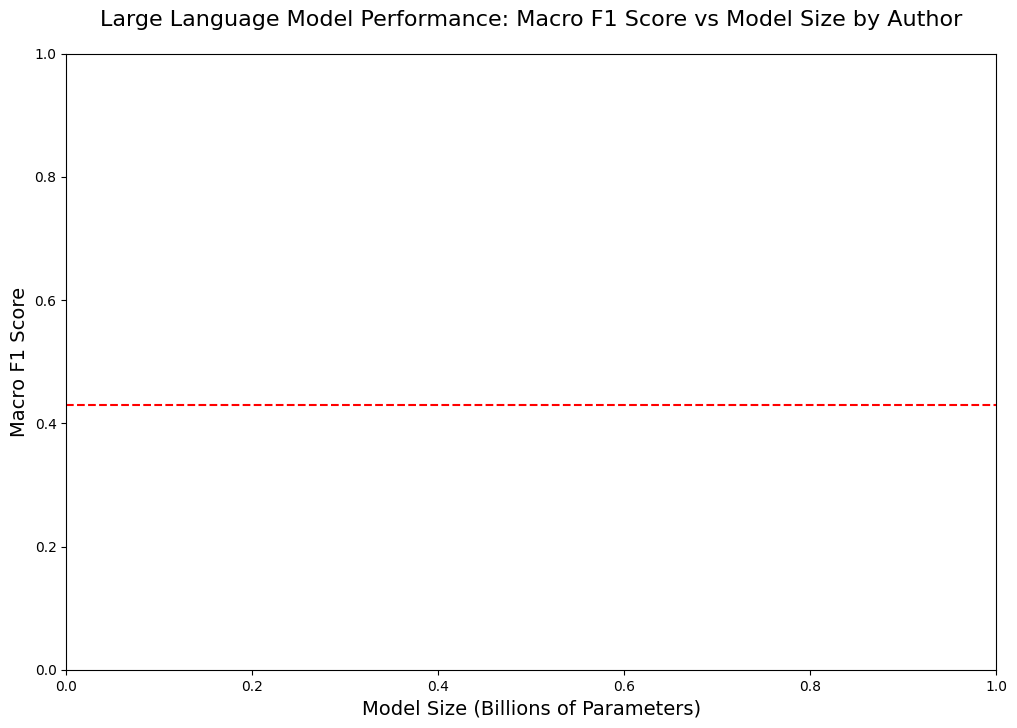

In [8]:
from evaluate import evaluate_models
from model_card import ModelCard


evaluate_models([ ModelCard("chatgpt + deepseek", "4o + r1", "openai + deepseek",
                  "OpenAI + deepseek", 0.0017, 0, "./results/deepseek-openai/deepseek_openai_combined.csv"),],"brief")